#**Optimisation stochastique**

Membres du groupe :
- CHAHBI EL ALAOUI Haytham
- SALEHI Abderrahmane
- HAFSI Ayman
- LIMI Zakaria

We're going to apply two types of MCMC (Monte Carlo) simulation algorithms on our function :

$$
f(x) = \exp\left(-\frac{x^2}{2}\right) \left(\sin(6 + x)^2 + 3\cos(x)^2\sin(4x)^2 + 1\right)
$$

- The rejection sampling algorithm using two different proposal function for comparison.
- The Metropolis-Hastings algorithm and trying to figure out which is the best step-size.


**Sampling rejection algorithm**

f(x) below is a hard function, we're going to try to simulate it using Rejection Sampling algorithm

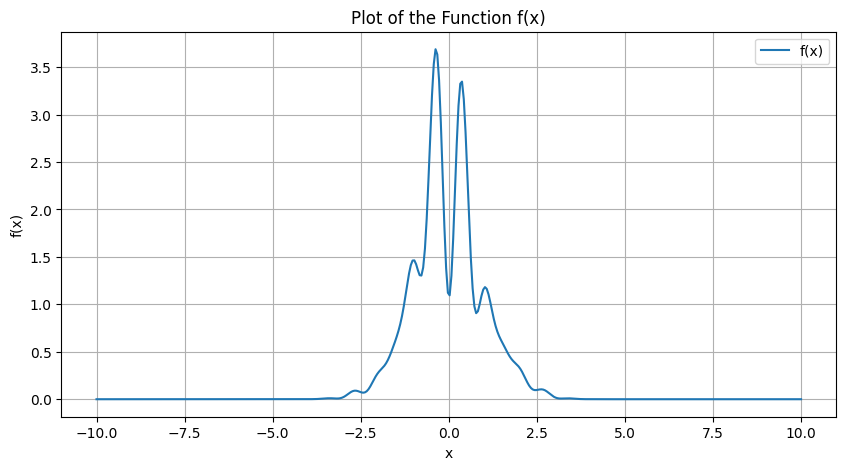

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1)

# Generate a range of x values
x = np.linspace(-10, 10, 400)

# Compute the function values
y = f(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x)')
plt.title('Plot of the Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


We're gonna use the uniform distribution as our proposal function in our rejection sampling algorithm, and then plot the acceptance region and the rejection region.

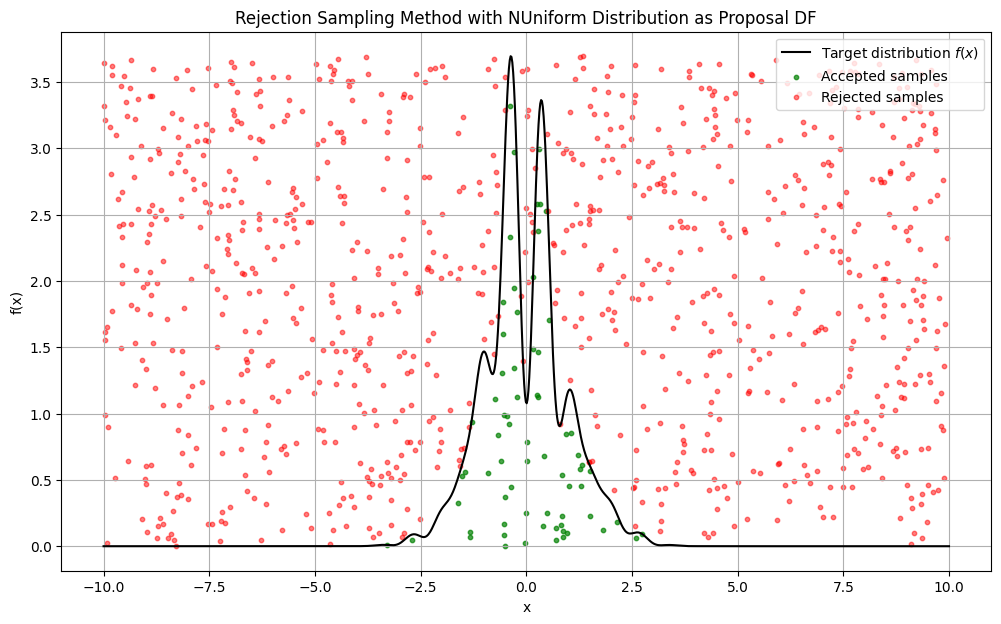

In [ ]:
# Define the range of x and the maximum value of f(x) for the rejection sampling
x_range = np.linspace(-10, 10, 1000)
f_max = max(f(x_range))

# Number of samples we wish to generate
n_samples = 1000

# Initialize arrays to store accepted and rejected samples
accepted_x = []
accepted_y = []
rejected_x = []
rejected_y = []

# Rejection sampling loop
for _ in range(n_samples):
    # Sample from the proposal uniform distribution
    x_proposal = np.random.uniform(-10, 10)
    # Corresponding value of f(x)
    f_proposal = f(x_proposal)
    # Sample from uniform distribution for y
    y_proposal = np.random.uniform(0, f_max)

    # Accept or reject the sample based on the target distribution
    if y_proposal < f_proposal:
        accepted_x.append(x_proposal)
        accepted_y.append(y_proposal)
    else:
        rejected_x.append(x_proposal)
        rejected_y.append(y_proposal)

# Plotting
plt.figure(figsize=(12, 7))

# Plot the target distribution
plt.plot(x_range, f(x_range), label='Target distribution $f(x)$', color='black')

# Plot the accepted samples
plt.scatter(accepted_x, accepted_y, color='green', s=10, label='Accepted samples', alpha=0.7)

# Plot the rejected samples
plt.scatter(rejected_x, rejected_y, color='red', s=10, label='Rejected samples', alpha=0.5)

# Annotations
plt.title('Rejection Sampling Method with NUniform Distribution as Proposal DF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Using the normal distribution now.

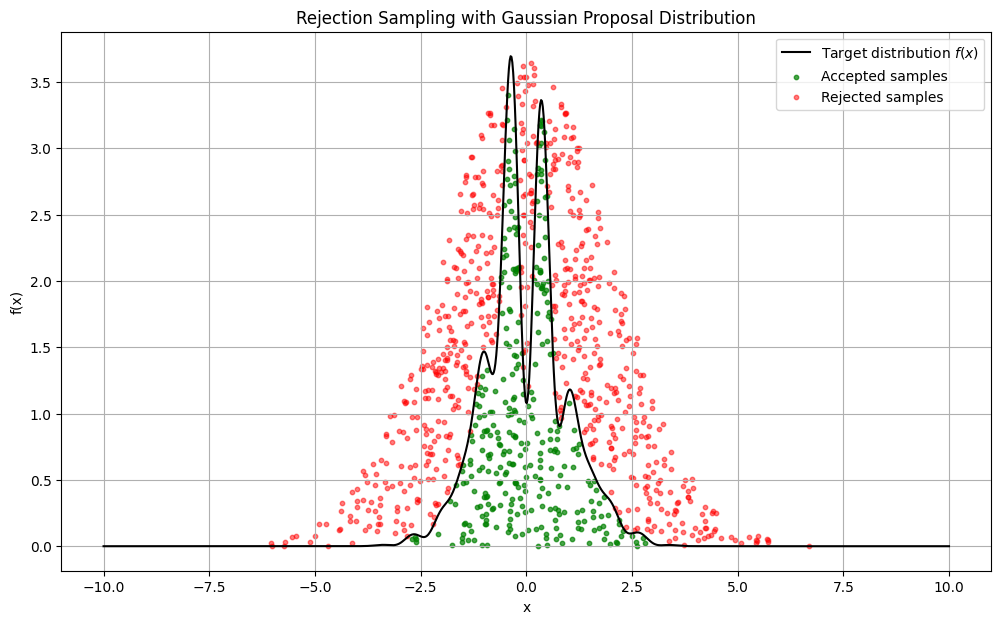

In [ ]:
from scipy import stats

# Define the proposal distribution as a Gaussian distribution
proposal_mean = 0  # mean of the proposal Gaussian distribution
proposal_std = 2   # standard deviation of the proposal Gaussian distribution

# Number of samples we wish to generate
n_samples = 1000

# Initialize arrays to store accepted and rejected samples
accepted_x = []
accepted_y = []
rejected_x = []
rejected_y = []

# Rejection sampling loop
for _ in range(n_samples):
    # Sample from the proposal Gaussian distribution
    x_proposal = np.random.normal(proposal_mean, proposal_std)
    # Corresponding value of f(x)
    f_proposal = f(x_proposal)
    # We scale the proposal DF by a constant factor that ensures it's always above the target DF.
    proposal_scale_factor = f_max / stats.norm.pdf(0, proposal_mean, proposal_std)  # scaling factor
    y_proposal = np.random.uniform(0, stats.norm.pdf(x_proposal, proposal_mean, proposal_std) * proposal_scale_factor)

    # Accept or reject the sample based on the target distribution
    if y_proposal < f_proposal:
        accepted_x.append(x_proposal)
        accepted_y.append(y_proposal)
    else:
        rejected_x.append(x_proposal)
        rejected_y.append(y_proposal)

# Plotting
plt.figure(figsize=(12, 7))

# Plot the target distribution
plt.plot(x_range, f(x_range), label='Target distribution $f(x)$', color='black')

# Plot the accepted samples
plt.scatter(accepted_x, accepted_y, color='green', s=10, label='Accepted samples', alpha=0.7)

# Plot the rejected samples
plt.scatter(rejected_x, rejected_y, color='red', s=10, label='Rejected samples', alpha=0.5)

# Annotations
plt.title('Rejection Sampling with Gaussian Proposal Distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



The comparison of acceptance and rejection rates between the two proposal distributions

In [ ]:
# Initialize lists to store the acceptance and rejection rates for both proposal distributions
acceptance_rates = {'uniform': [], 'gaussian': []}
rejection_rates = {'uniform': [], 'gaussian': []}

# Proposal distributions
proposal_distributions = {
    'uniform': lambda: np.random.uniform(-10, 10),
    'gaussian': lambda: np.random.normal(proposal_mean, proposal_std)
}

# Rejection sampling function
def rejection_sampling(proposal_dist_name, proposal_dist_func, n_samples):
    accepted_samples = 0
    rejected_samples = 0

    for _ in range(n_samples):
        x_proposal = proposal_dist_func()
        f_proposal = f(x_proposal)
        y_proposal = np.random.uniform(0, f_max if proposal_dist_name == 'uniform' else
                                       stats.norm.pdf(x_proposal, proposal_mean, proposal_std) * proposal_scale_factor)

        if y_proposal < f_proposal:
            accepted_samples += 1
        else:
            rejected_samples += 1

    # Calculate and return the acceptance and rejection rates
    acceptance_rate = accepted_samples / n_samples
    rejection_rate = rejected_samples / n_samples
    return acceptance_rate, rejection_rate

# Number of samples we wish to generate for comparison
n_samples = 10000

# Perform rejection sampling for both proposal distributions and store the rates
for name, func in proposal_distributions.items():
    acc_rate, rej_rate = rejection_sampling(name, func, n_samples)
    acceptance_rates[name].append(acc_rate)
    rejection_rates[name].append(rej_rate)

# Output the acceptance and rejection rates for both proposal distributions
acceptance_rates, rejection_rates


({'uniform': [0.078], 'gaussian': [0.3021]},
 {'uniform': [0.922], 'gaussian': [0.6979]})

For the uniform distribution as the proposal:

Acceptance Rate: 8%
Rejection Rate: 92%

For the Gaussian distribution as the proposal:

Acceptance Rate: 30.99%
Rejection Rate: 69.01%

This comparison indicates that using the Gaussian distribution as the proposal function results in a significantly higher acceptance rate and a lower rejection rate compared to using the uniform distribution. The Gaussian proposal distribution is more efficient for this particular target distribution
f(x), given the calculated acceptance and rejection rates.

**Metropolis-Hastings**

We 're gonna apply now the Metropolis Hastings algorithm on our target function above. But first, we're gonna apply just the Metropolis acceptance criterion. After, we're gonna add the Hastings Ratio

In [ ]:
# Metropolis algorithm without Hastings adjustment
def metropolis(sigma, n=1000):
    samples = np.zeros(n)
    current_x = np.random.randn()  # Start with a random x from a standard normal distribution
    for i in range(1, n):
        # Propose a new point from Q(x, ·) = N(current_x, σ^2)
        proposed_x = np.random.normal(current_x, sigma)
        # Calculate acceptance probability
        acceptance_prob = min(1, f(proposed_x) / f(current_x))
        # Accept or reject the new point
        if acceptance_prob > np.random.rand():
            current_x = proposed_x
        samples[i] = current_x
    return samples

# Parameters

n = 1000   # Sample size

# Different σ values for the proposal distribution Q(x, ·) = N(x, σ^2)
sigma_values = [0.1, 0.5, 1, 2]

# Dictionary to hold the samples for different σ values
samples_dict = {}

# Run the Metropolis algorithm for each σ value and store the samples
for sigma in sigma_values:
    samples_dict[f'sigma={sigma}'] = metropolis(sigma, n)

# The samples are now stored in samples_dict

Now, we're gonna visualize the Histograms for the different step sizes(sigmas)

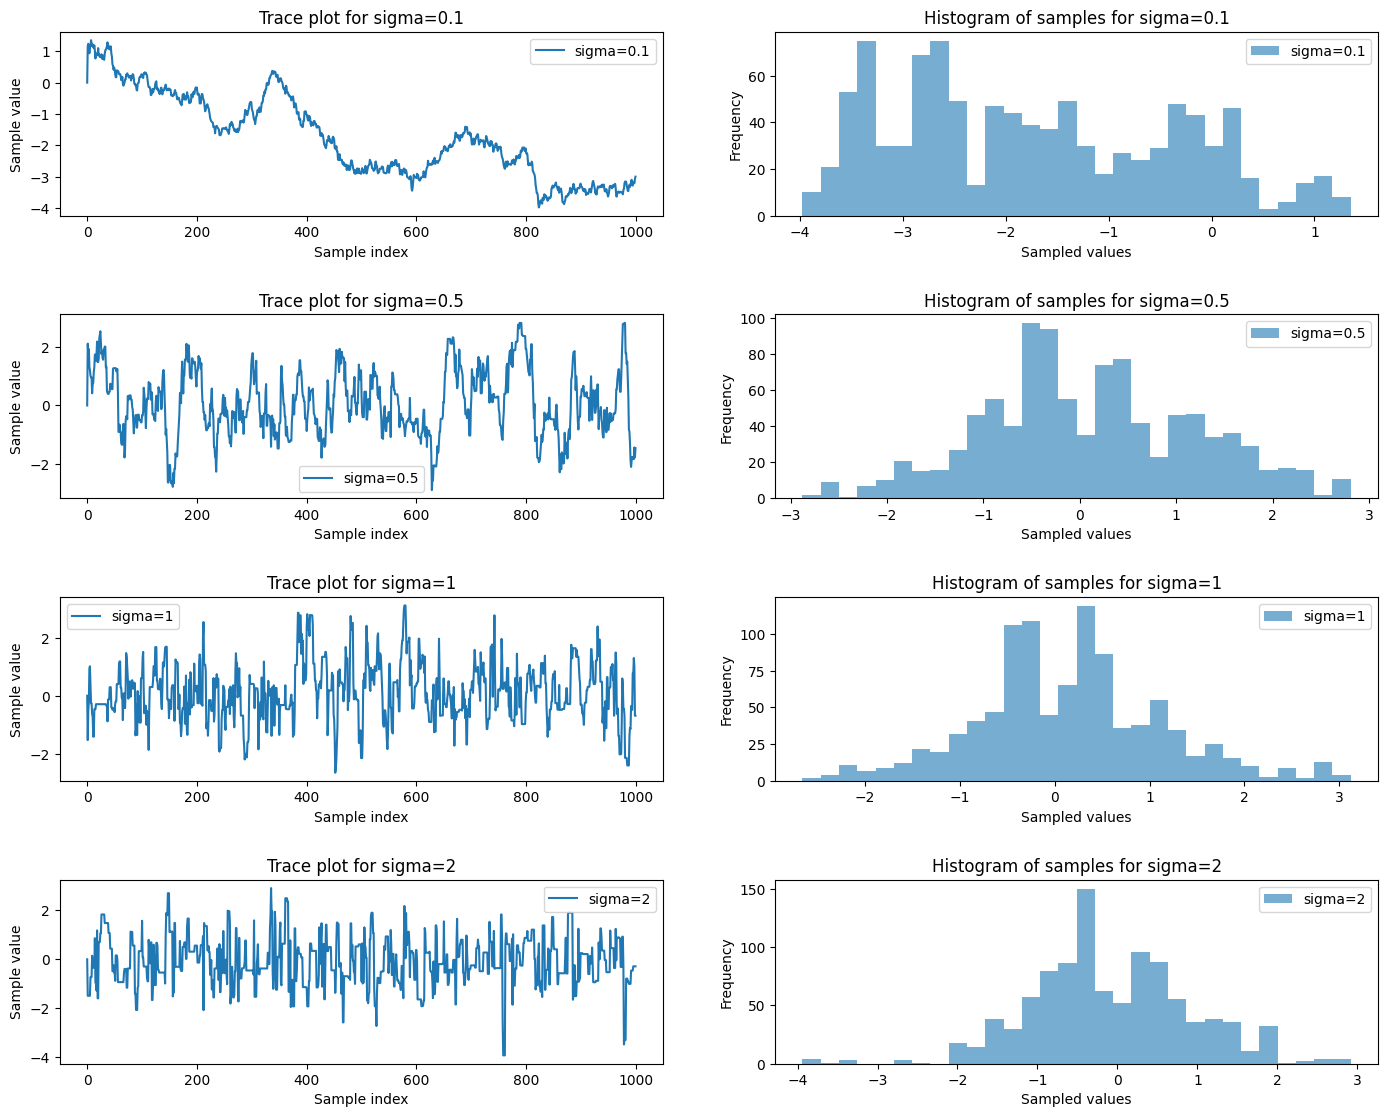

In [ ]:
#Plot the samples and histograms for each sigma value separately
fig, axes = plt.subplots(len(sigma_values), 2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

for i, sigma in enumerate(sigma_values):
    sigma_key = f'sigma={sigma}'
    samples = samples_dict[sigma_key]

    ax_trace = axes[i][0]
    ax_trace.plot(samples, label=sigma_key)
    ax_trace.set_title(f'Trace plot for {sigma_key}')
    ax_trace.set_xlabel('Sample index')
    ax_trace.set_ylabel('Sample value')
    ax_trace.legend()

    ax_hist = axes[i][1]
    ax_hist.hist(samples, bins=30, alpha=0.6, label=sigma_key)
    ax_hist.set_title(f'Histogram of samples for {sigma_key}')
    ax_hist.set_xlabel('Sampled values')
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend()

plt.show()

Now, we're adding the Hastings Ratio using the library scipy.

In [ ]:
from scipy import stats

# Define the Metropolis-Hastings algorithm with the Hastings ratio
def metropolis_hastings(sigma, n=1000):
    samples = np.zeros(n)
    current_x = np.random.randn()  # Start with a random x from a standard normal distribution

    # Define the proposal distribution Q(x|y) - a normal distribution centered at y with standard deviation sigma
    proposal_pdf = lambda x, y: stats.norm.pdf(x, loc=y, scale=sigma)

    for i in range(1, n):
        # Propose a new point from Q(x, ·) = N(current_x, σ^2)
        proposed_x = np.random.normal(current_x, sigma)
        # Calculate the acceptance ratio (including the Hastings ratio)
        # The Hastings ratio is the proposal probability of moving back to the current position from the proposed
        hastings_ratio = proposal_pdf(current_x, proposed_x) / proposal_pdf(proposed_x, current_x)
        acceptance_prob = min(1, ( f(proposed_x) / f(current_x)) * hastings_ratio)
        # Accept or reject the new point
        if acceptance_prob > np.random.rand():
            current_x = proposed_x
        samples[i] = current_x
    return samples


# Parameters
n = 1000   # Sample size

# Different σ values for the proposal distribution Q(x, ·) = N(x, σ^2)
sigma_values = [0.1, 0.5, 1, 2]

# Dictionary to hold the samples for different σ values
samples_dict = {}

# Run the Metropolis algorithm for each σ value and store the samples
for sigma in sigma_values:
    samples_dict[f'sigma={sigma}'] = metropolis_hastings(sigma, n)

# The samples are now stored in samples_dict


Now, we're gonna visualize the histograms.

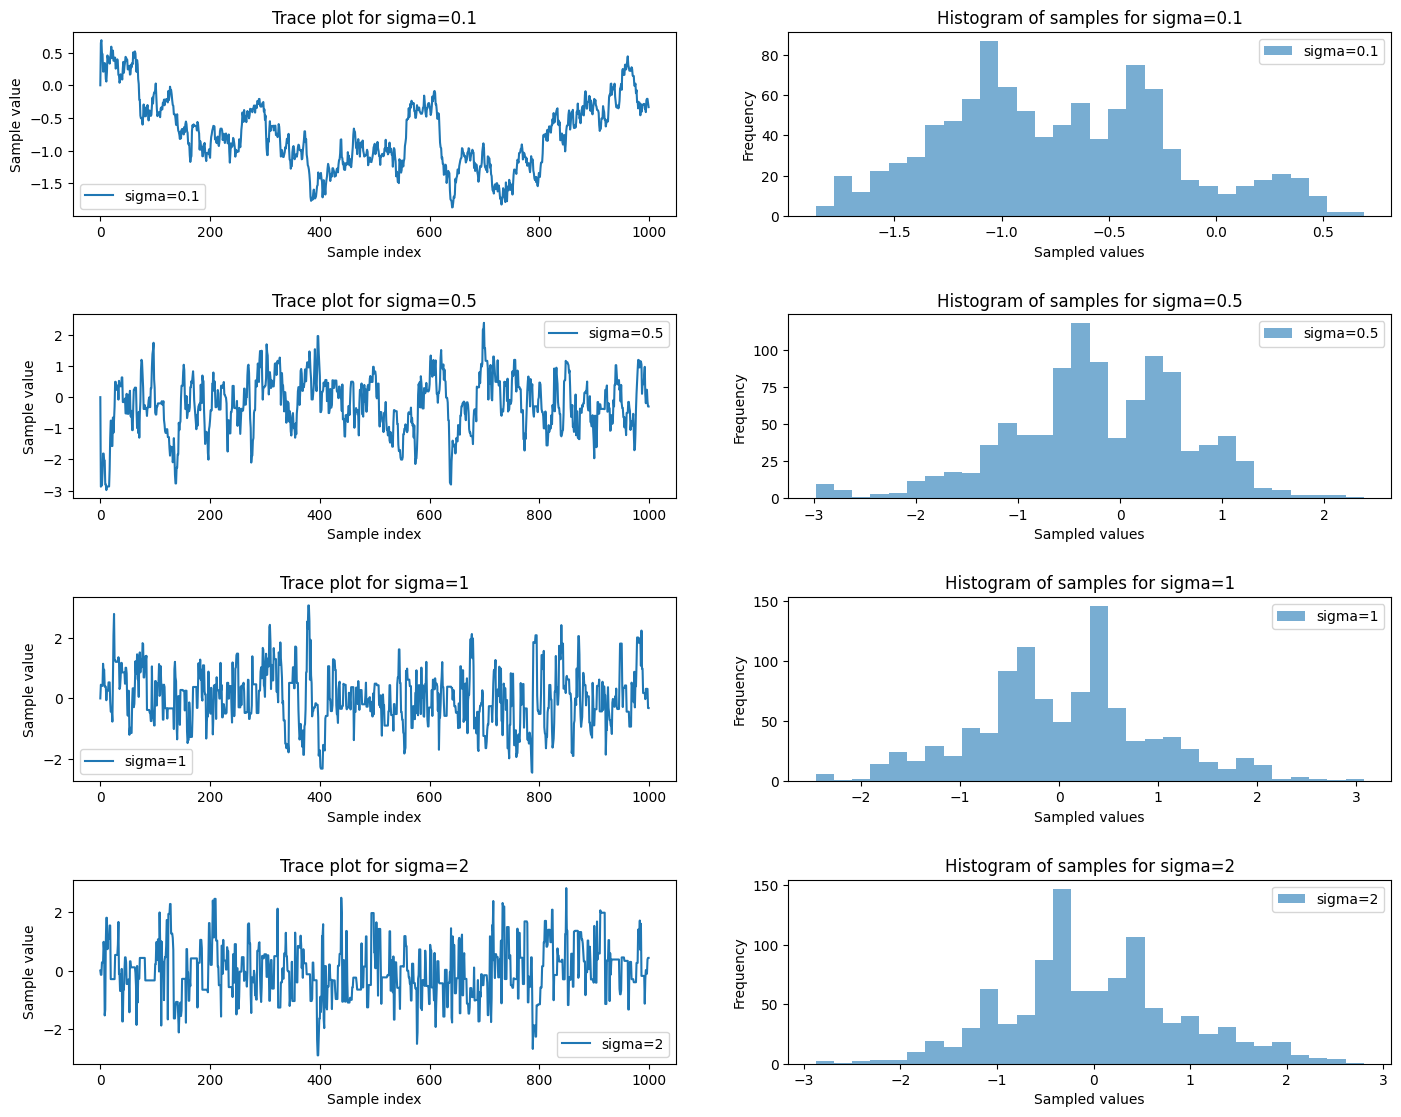

In [ ]:
#Plot the samples and histograms for each sigma value separately
fig, axes = plt.subplots(len(sigma_values), 2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

for i, sigma in enumerate(sigma_values):
    sigma_key = f'sigma={sigma}'
    samples = samples_dict[sigma_key]

    ax_trace = axes[i][0]
    ax_trace.plot(samples, label=sigma_key)
    ax_trace.set_title(f'Trace plot for {sigma_key}')
    ax_trace.set_xlabel('Sample index')
    ax_trace.set_ylabel('Sample value')
    ax_trace.legend()

    ax_hist = axes[i][1]
    ax_hist.hist(samples, bins=30, alpha=0.6, label=sigma_key)
    ax_hist.set_title(f'Histogram of samples for {sigma_key}')
    ax_hist.set_xlabel('Sampled values')
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend()

plt.show()

For better simulations, we should find the optimal step-size (sigma) for applying the Metropolis-Hastings algorithm, it's a hyperparameter. We're gonna try to find the ideal step size that best simulates our target function . We're gonna use 20 different step sizes in the range between 0,1 and 2,0 and try to visualize the best one .

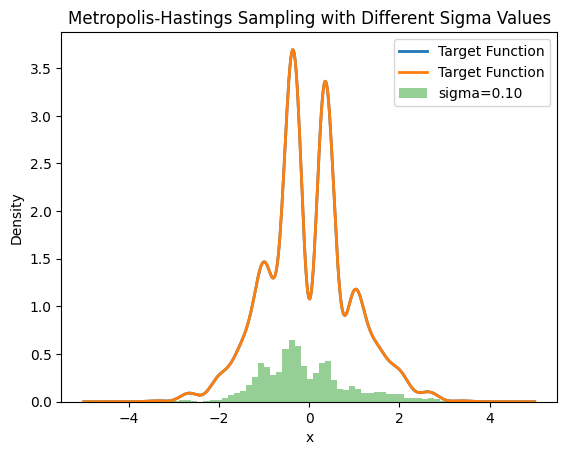

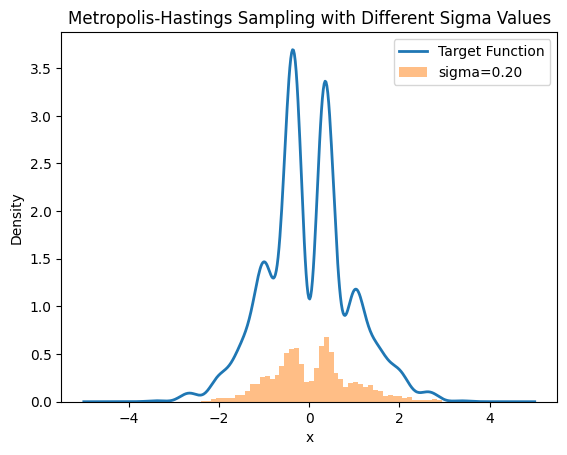

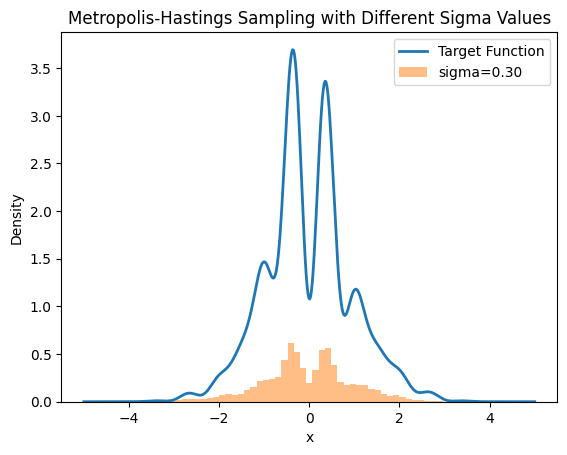

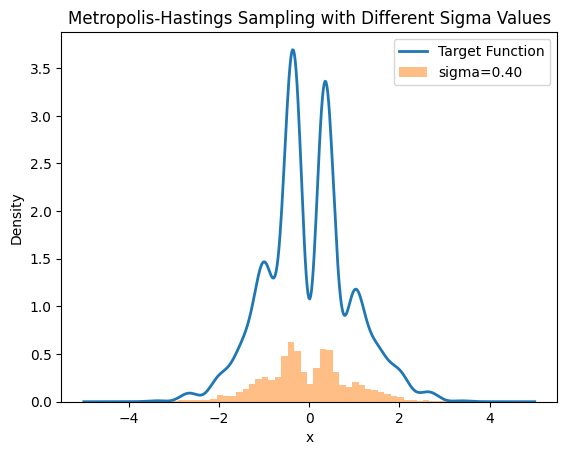

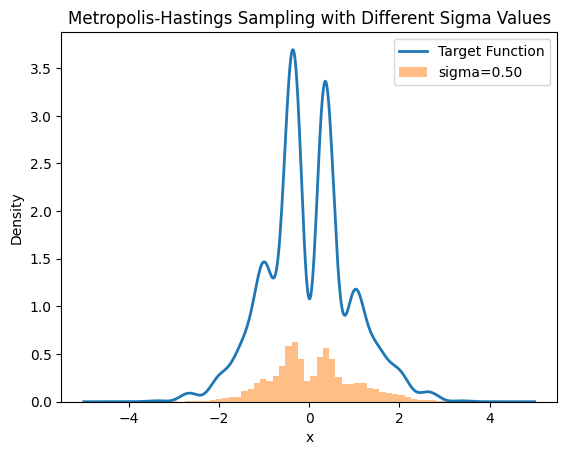

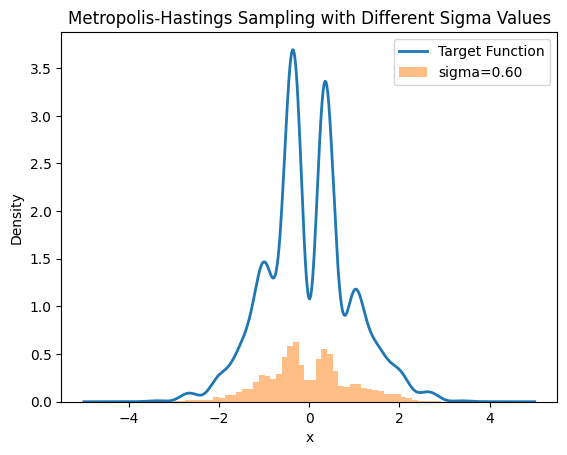

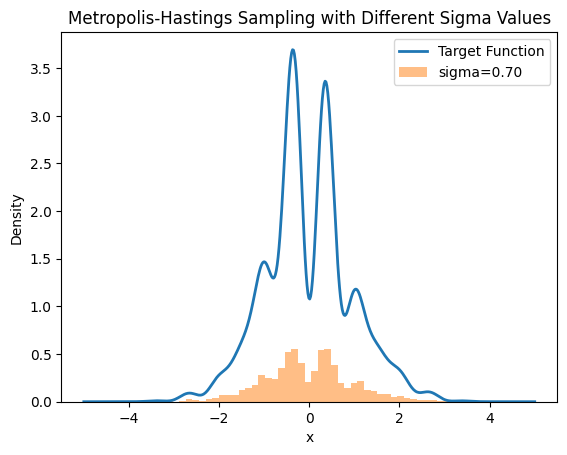

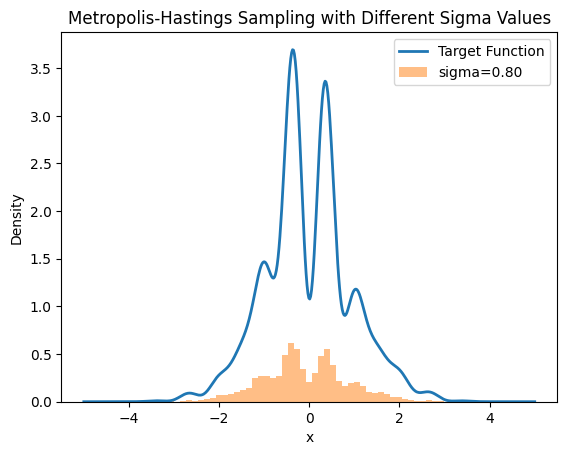

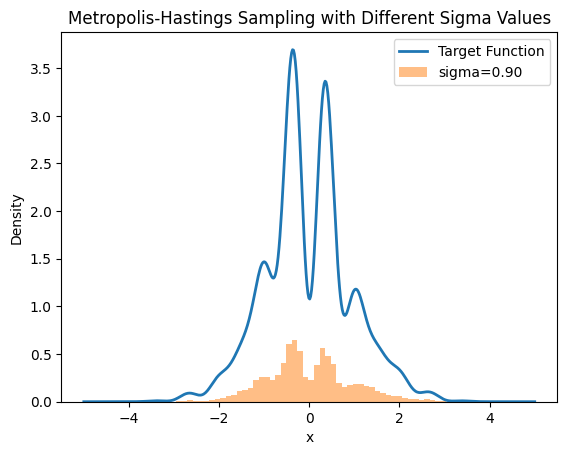

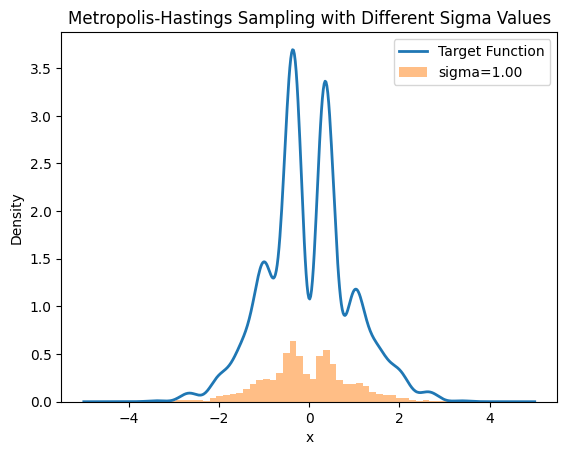

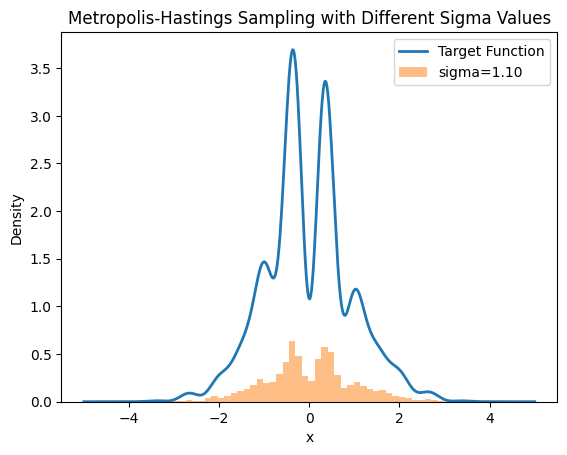

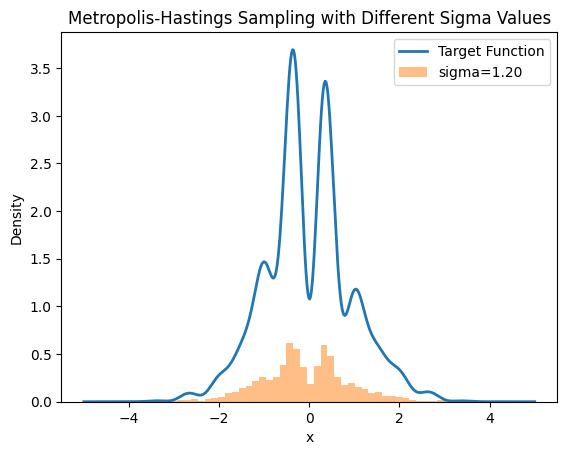

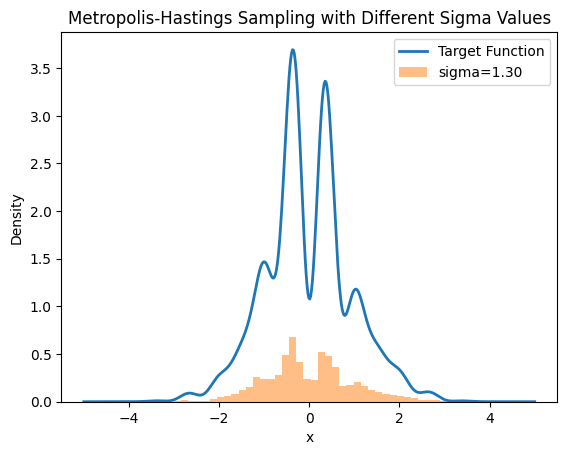

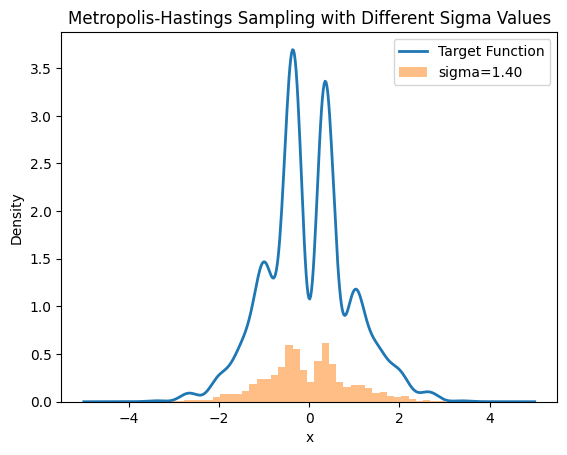

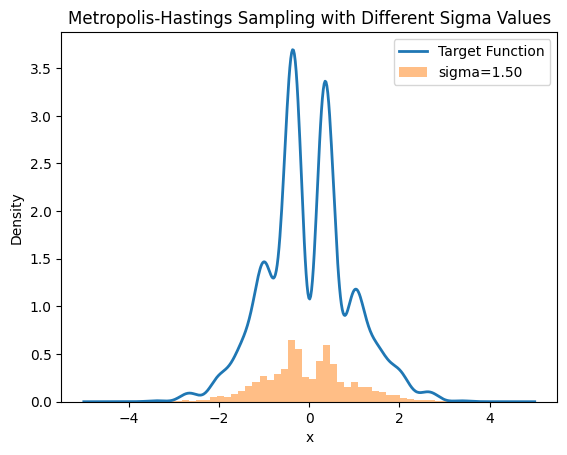

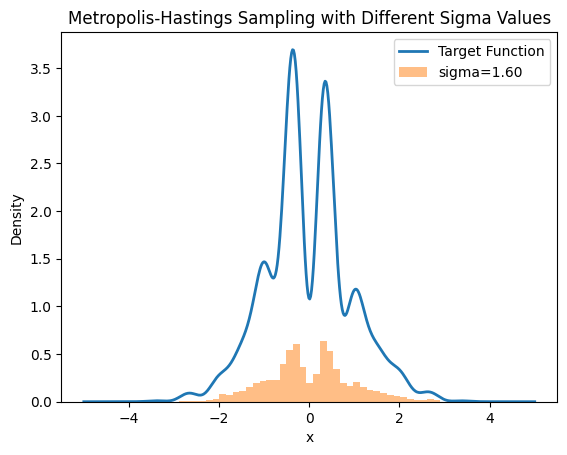

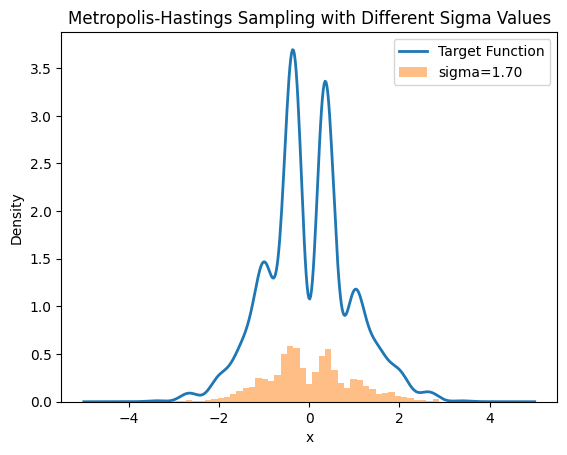

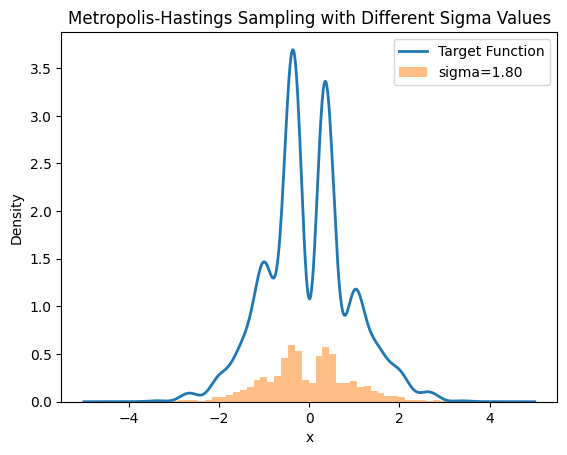

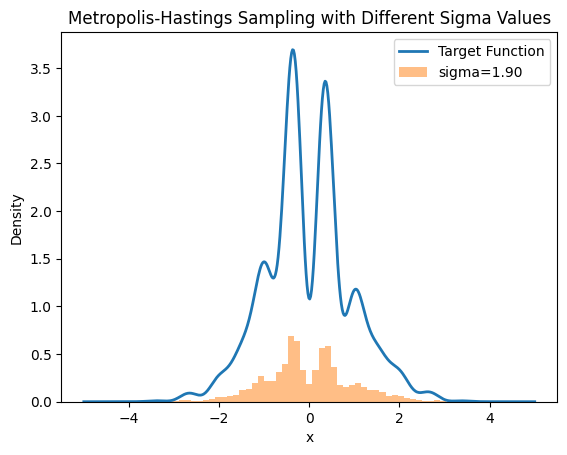

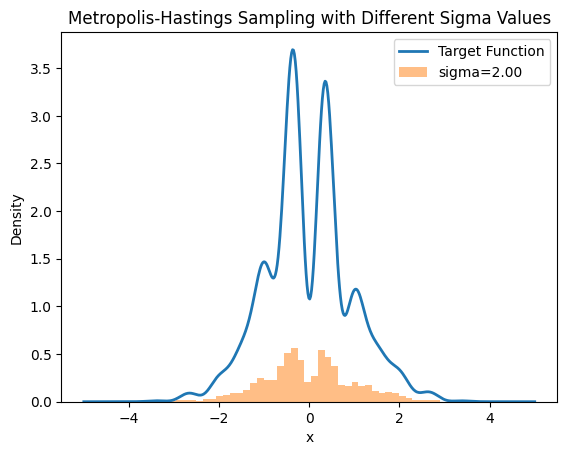

In [ ]:

# Parameters
n = 10000  # Increase the sample size for better results

# Different σ values for the proposal distribution Q(x, ·) = N(x, σ^2)
sigma_values = np.linspace(0.1, 2.0, 20)  # Create a range of sigma values

# Dictionary to hold the histograms for different σ values
histograms_dict = {}

# Run the Metropolis algorithm for each σ value and store the histograms
for sigma in sigma_values:
    samples = metropolis_hastings(sigma, n)
    histograms_dict[f'sigma={sigma:.2f}'] = samples

# Plot the target function
x = np.linspace(-5, 5, 500)
plt.plot(x, f(x), label='Target Function', linewidth=2)

# Plot the histograms for different σ values

for sigma, samples in histograms_dict.items():
    x = np.linspace(-5, 5, 500)
    plt.plot(x, f(x), label='Target Function', linewidth=2)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=sigma)

    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Metropolis-Hastings Sampling with Different Sigma Values')
    plt.show()

After visualizing, we have an idea of which step-sizes are the ideal ones, but we need a theoritical method to compare the simulated and the target functions. We're gonna use RMSE(Root Mean Square Error) to compare.

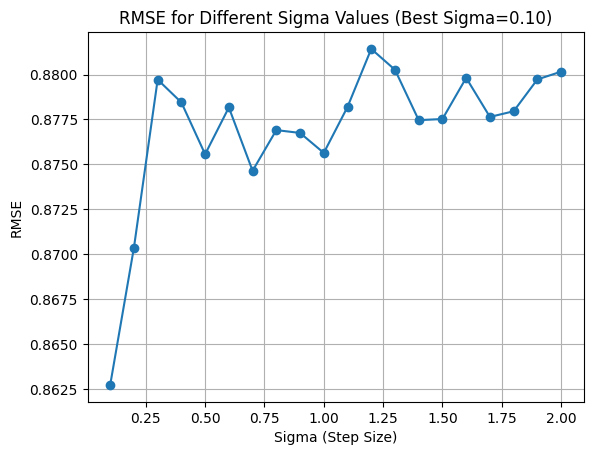

The best sigma value is: 0.10


In [ ]:
# True distribution
x_true = np.linspace(-5, 5, 500)
y_true = f(x_true)

# Dictionary to hold RMSE values for different σ values
rmse_dict = {}

# Run the Metropolis algorithm for each σ value and calculate RMSE
for sigma in sigma_values:
    samples = metropolis_hastings(sigma, n)

    # Calculate the histogram of the samples
    hist, bins = np.histogram(samples, bins=50, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Interpolate the histogram to the target function's x-values
    y_interpolated = np.interp(x_true, bin_centers, hist)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true - y_interpolated)**2))
    rmse_dict[sigma] = rmse

# Find the sigma value with the lowest RMSE
best_sigma = min(rmse_dict, key=rmse_dict.get)

# Plot RMSE values for different sigma values
plt.plot(sigma_values, [rmse_dict[sigma] for sigma in sigma_values], marker='o')
plt.xlabel('Sigma (Step Size)')
plt.ylabel('RMSE')
plt.title(f'RMSE for Different Sigma Values (Best Sigma={best_sigma:.2f})')
plt.grid(True)
plt.show()

print(f"The best sigma value is: {best_sigma:.2f}")

The RMSE method gave us the best sigma value to be 0.10 , and also by visualizing it in the plots above. But we cannot rely on one statistical method to compare. There are several other methods and the results can be different.

**Comparison between the two algorithms**

Between the two algorithms ( Metropolis-Hastings and Rejection Sampling), we're gonna try to see which is the best one that simulates our target function. We're gonna visualize the histogram to compare, and the acceptance rates of the two algorithms.

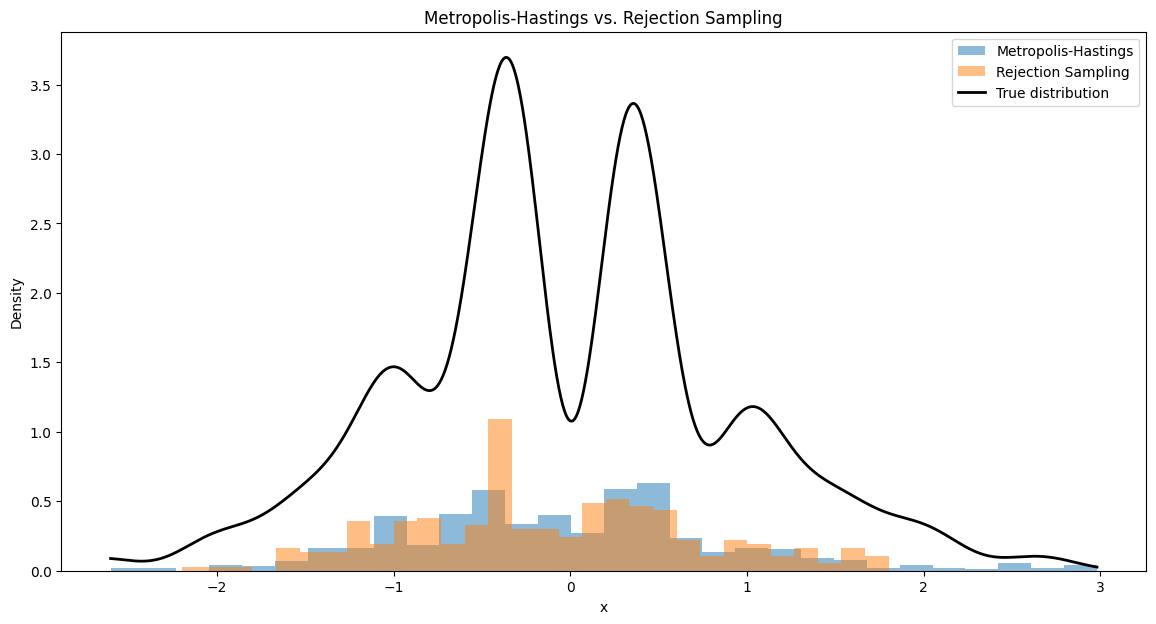

Metropolis-Hastings Acceptance Rate: 0.44544544544544545
Rejection Sampling Acceptance Rate: 0.0275


In [ ]:
# Generate samples using metropolis_hastings
mh_samples = metropolis_hastings(sigma=2, n=1000)

#For the rejection sampling, we didn't define a function above, we just coded the algorithm, and for comparison,  we need to define its funcion ;
f_max = max(f(np.random.uniform(-10, 10, 1000)))

def rejection_sampling(f, proposal_mean, proposal_std, f_max, n_samples):
    accepted_samples = []
    for _ in range(n_samples):
        x_proposal = np.random.normal(proposal_mean, proposal_std)
        y = np.random.uniform(0, f_max)
        if y < f(x_proposal):
            accepted_samples.append(x_proposal)
    return np.array(accepted_samples)

rs_samples = rejection_sampling(f, proposal_mean=0, proposal_std=2, f_max=f_max, n_samples=1000)
# Plot histograms of the samples and compare acceptance rates
plt.figure(figsize=(14, 7))

# Metropolis-Hastings histogram
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, label='Metropolis-Hastings')

# Rejection Sampling histogram
plt.hist(rs_samples, bins=30, density=True, alpha=0.5, label='Rejection Sampling')

# True distribution plot
x_values = np.linspace(min(np.concatenate((mh_samples, rs_samples))),
                       max(np.concatenate((mh_samples, rs_samples))), 1000)
plt.plot(x_values, f(x_values), label='True distribution', color='black', linewidth=2)

plt.title('Metropolis-Hastings vs. Rejection Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate acceptance rates
mh_acceptance_rate = np.mean(np.diff(mh_samples) != 0)
rs_acceptance_rate = len(rs_samples) / n_samples

print(f'Metropolis-Hastings Acceptance Rate: {mh_acceptance_rate}')
print(f'Rejection Sampling Acceptance Rate: {rs_acceptance_rate}')

The histograms for both Metropolis-Hastings and Rejection Sampling have been plotted alongside the true distribution curve, and their acceptance rates have been calculated.

Metropolis-Hastings Acceptance Rate: Approximately 44.54%

Rejection Sampling Acceptance Rate: Approximately 28%

From the acceptance rate, it seems that the Metropolis-Hastings algorithm has a higher rate of accepting samples than Rejection Sampling. This might indicate that Metropolis-Hastings is more efficient in generating samples for this particular target distribution. However, acceptance rate alone doesn't determine the "best" algorithm for simulating the distribution; the quality of the samples, their convergence to the target distribution, and computational efficiency should also be considered.

**Simulated Annealing** ( Finding the max of our function)

Simulated Annealing (SA) is conceptually different from Metropolis-Hastings and Rejection Sampling, although all three are stochastic algorithms and can be used to explore complex probability distributions.


Simulated Annealing (SA) is conceptually different from Metropolis-Hastings and Rejection Sampling, although all three are stochastic algorithms and can be used to explore complex probability distributions.

Metropolis-Hastings and Rejection Sampling are both methods used to generate samples from a probability distribution that is difficult to sample from directly. They are often used in the context of Bayesian inference or to generate random variables in a Monte Carlo simulation.

Simulated Annealing, on the other hand, is typically used as an optimization algorithm. It is designed to find a good approximation to the global maximum (or minimum) of a function over a given set.

In [ ]:
# Simulated Annealing algorithm
def simulated_annealing(f, x0, T0, alpha, n_iterations):
    x_current = x0
    f_current = f(x0)
    x_best = x0
    f_best = f(x0)
    T = T0

    for i in range(n_iterations):
        # Propose a new point by taking a step in a random direction
        step = np.random.normal(0, T)
        x_new = x_current + step
        f_new = f(x_new)

        # Decide whether to accept the new point
        if f_new > f_current or np.random.rand() < np.exp((f_new - f_current) / T):
            x_current, f_current = x_new, f_new

            # Check if the new point is the best so far
            if f_new > f_best:
                x_best, f_best = x_new, f_new

        # Cool down the temperature
        T = T * alpha

    return x_best, f_best

# Define the parameters for the simulated annealing
x0 = 0  # Initial point
T0 = 1  # Initial temperature
alpha = 0.95  # Cooling rate
n_iterations = 1000  # Number of iterations

# Run the simulated annealing algorithm
x_best, f_best = simulated_annealing(f, x0, T0, alpha, n_iterations)

# Display the best solution found
x_best, f_best


(-0.3632244340759519, 3.6958145027736706)